In [47]:
ds=[1,2,4,8,10,16,17,18,19,20,21,24,25,27,29,31,32,33]
wt=[3,5,6,7,9,11,12,13,14,22,23,26,28,30]
# 15 where??
m=[2,3,4,6,7,8,13,14,15,18,20,21,22,23,24,26,27,28,29,30,32,33]
f=[1,5,9,10,11,12,16,17,19,25,31]


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "/media/NASmount/UCL collected data/2024-04-Apr-May-Downs/DB/kage1/analysis/move_output/kage1_move.csv"

kg = 1
file_path = fr"C:\Users\mariu\Documents\down sindrome mice data\kage{kg}_move.csv"
df = pd.read_csv(file_path, sep=",")  # Assuming tab-separated values, adjust if needed
# df = df[df["date"]>20240403]
bin_size = 5 * 60  # 5 minutes in seconds
df['bin'] = (df['timestamp'] // bin_size) * bin_size
binned_df = df.groupby(['date', 'bin'])['velocity'].mean().reset_index()
avg_binned_df = binned_df.groupby('bin')['velocity'].mean().reset_index()


kage1
kage2
kage4
kage8
kage10
kage16
kage17
kage18
kage19
kage20
kage21
kage24
kage25
kage27
kage29
kage31
kage32
kage33


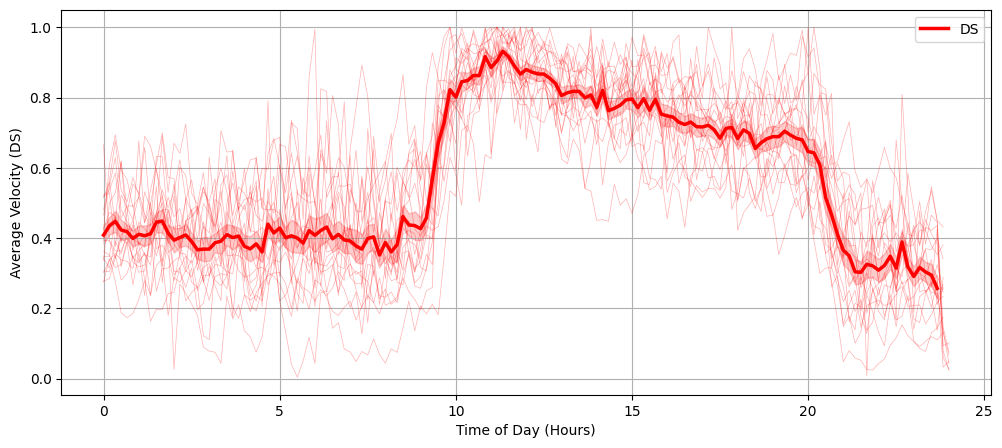

kage3
kage5
kage6
kage7
kage9
kage11
kage12
kage13
kage14
kage22
kage23
kage26
kage28
kage30


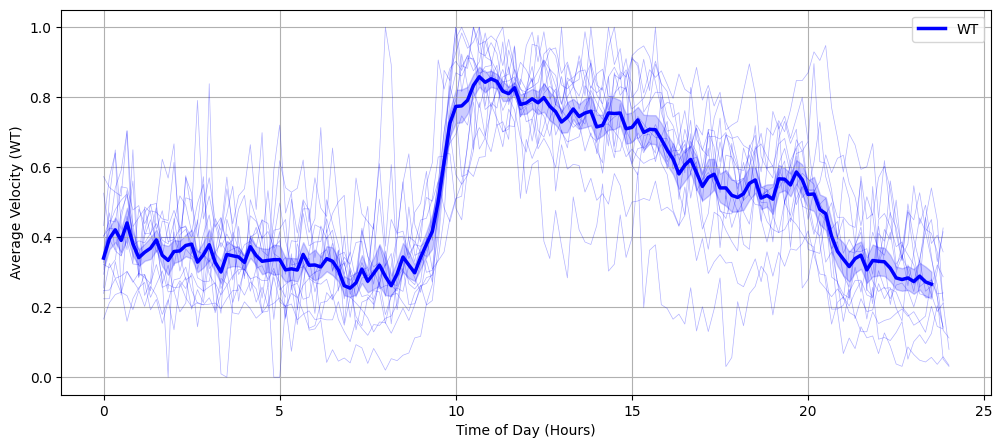

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem

bin_size = 10 * 60  # 10 minutes in seconds
time_bins = np.arange(0, 86400 + bin_size, bin_size)  # Full 24-hour day

ds_all_vel = []
wt_all_vel = []

# Plot for DS (Red)
plt.figure(figsize=(12, 5))

for kg in ds:
    print(f'kage{kg}')
    file_path = fr"C:\Users\mariu\Documents\down sindrome mice data\kage{kg}_move.csv"
    df = pd.read_csv(file_path, sep=",")  # Assuming comma-separated values
    df['bin'] = (df['timestamp'] // bin_size) * bin_size
    binned_df = df.groupby(['date', 'bin'])['velocity'].mean().reset_index()
    avg_binned_df = binned_df.groupby('bin')['velocity'].mean().reset_index()
    avg_binned_df = avg_binned_df[avg_binned_df["bin"] < 86401]

    maxvel = avg_binned_df['velocity'].max()
    avg_binned_df["scaled_vel"] = avg_binned_df["velocity"].divide(maxvel)
    ds_all_vel.append(avg_binned_df["scaled_vel"].values)

    plt.plot(avg_binned_df["bin"] / 3600, avg_binned_df["scaled_vel"], linestyle='-', color='red', alpha=0.3, linewidth=0.5)

# Fixing the inconsistent array length issue
min_length = min(map(len, ds_all_vel))
ds_all_vel = np.array([vel[:min_length] for vel in ds_all_vel])  # Truncate all lists to match the shortest one

# Compute and plot DS average with SEM shading
ds_avg_vel = np.mean(ds_all_vel, axis=0)
ds_sem = sem(ds_all_vel, axis=0, nan_policy='omit')

x_values = np.arange(len(ds_avg_vel)) * bin_size / 3600
plt.plot(x_values, ds_avg_vel, color="red", linewidth=2.5, label="DS")
plt.fill_between(x_values, ds_avg_vel - ds_sem, ds_avg_vel + ds_sem, color="red", alpha=0.2)

plt.xlabel("Time of Day (Hours)")
plt.ylabel("Average Velocity (DS)")
plt.grid()
plt.legend()
plt.show()

# Plot for WT (Blue)
plt.figure(figsize=(12, 5))

for kg in wt:
    print(f'kage{kg}')
    file_path = fr"C:\Users\mariu\Documents\down sindrome mice data\kage{kg}_move.csv"
    df = pd.read_csv(file_path, sep=",")  # Assuming comma-separated values
    df['bin'] = (df['timestamp'] // bin_size) * bin_size
    binned_df = df.groupby(['date', 'bin'])['velocity'].mean().reset_index()
    avg_binned_df = binned_df.groupby('bin')['velocity'].mean().reset_index()
    avg_binned_df = avg_binned_df[avg_binned_df["bin"] < 86401]

    maxvel = avg_binned_df['velocity'].max()
    avg_binned_df["scaled_vel"] = avg_binned_df["velocity"].divide(maxvel)
    wt_all_vel.append(avg_binned_df["scaled_vel"].values)

    plt.plot(avg_binned_df["bin"] / 3600, avg_binned_df["scaled_vel"], linestyle='-', color='blue', alpha=0.3, linewidth=0.5)

# Fixing inconsistent array length issue for WT
min_length = min(map(len, wt_all_vel))
wt_all_vel = np.array([vel[:min_length] for vel in wt_all_vel])  # Truncate all lists to match the shortest one

# Compute and plot WT average with SEM shading
wt_avg_vel = np.mean(wt_all_vel, axis=0)
wt_sem = sem(wt_all_vel, axis=0, nan_policy='omit')

x_values = np.arange(len(wt_avg_vel)) * bin_size / 3600
plt.plot(x_values, wt_avg_vel, color="blue", linewidth=2.5, label="WT")
plt.fill_between(x_values, wt_avg_vel - wt_sem, wt_avg_vel + wt_sem, color="blue", alpha=0.2)

plt.xlabel("Time of Day (Hours)")
plt.ylabel("Average Velocity (WT)")
plt.grid()
plt.legend()
plt.show()




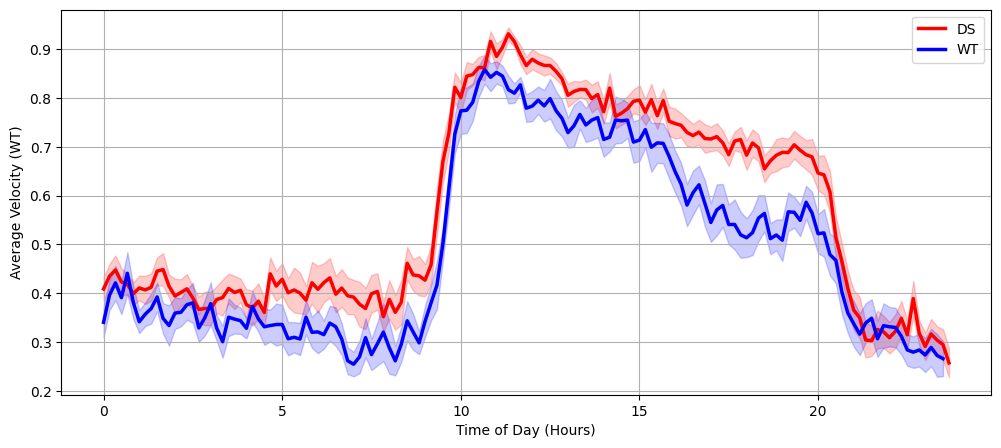

In [85]:
plt.figure(figsize=(12, 5))
x_values = np.arange(len(ds_avg_vel)) * bin_size / 3600
plt.plot(x_values, ds_avg_vel, color="red", linewidth=2.5, label="DS")
plt.fill_between(x_values, ds_avg_vel - ds_sem, ds_avg_vel + ds_sem, color="red", alpha=0.2)

x_values = np.arange(len(wt_avg_vel)) * bin_size / 3600
plt.plot(x_values, wt_avg_vel, color="blue", linewidth=2.5, label="WT")
plt.fill_between(x_values, wt_avg_vel - wt_sem, wt_avg_vel + wt_sem, color="blue", alpha=0.2)

plt.xlabel("Time of Day (Hours)")
plt.ylabel("Average Velocity (WT)")
plt.grid()
plt.legend()
plt.show()


kage1
kage2
kage4
kage8
kage10
kage15
kage16
kage17
kage18
kage19
kage20
kage21
kage24
kage25
kage27
kage29
kage31
kage32
kage33


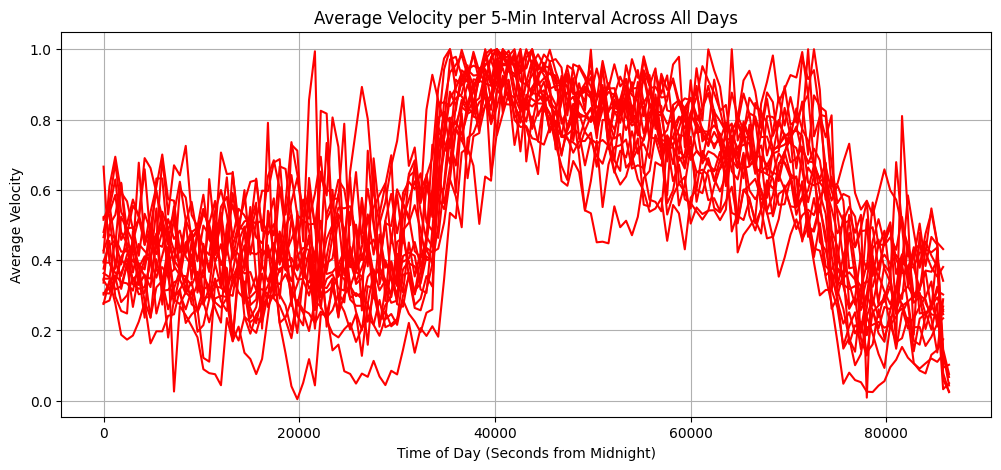

kage3
kage5
kage6
kage7
kage9
kage11
kage12
kage13
kage14
kage22
kage23
kage26
kage28
kage30


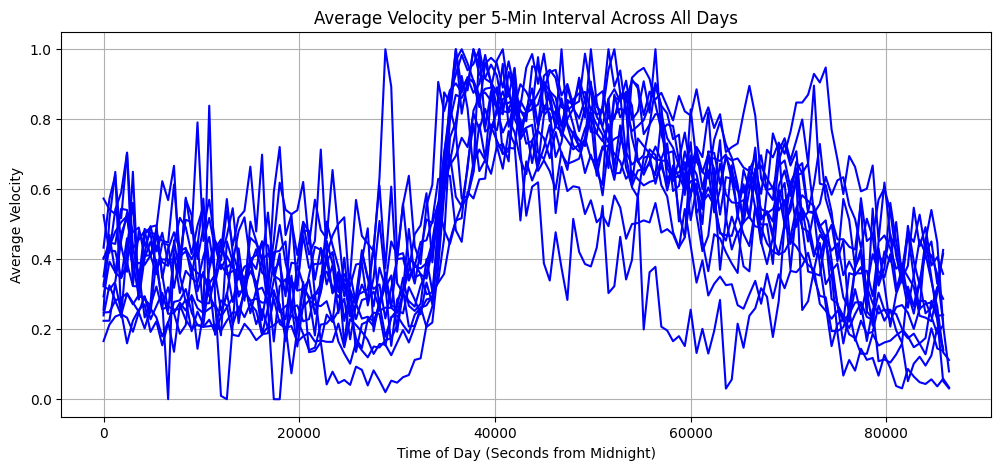

In [46]:
# avg_ds = DataF
# from tqdm import tqdm

kg = 1
plt.figure(figsize=(12, 5))
for kg in ds:
    print(f'kage{kg}')
    file_path = fr"C:\Users\mariu\Documents\down sindrome mice data\kage{kg}_move.csv"
    df = pd.read_csv(file_path, sep=",")  # Assuming tab-separated values, adjust if needed
    bin_size = 10 * 60  # 5 minutes in seconds
    df['bin'] = (df['timestamp'] // bin_size) * bin_size
    binned_df = df.groupby(['date', 'bin'])['velocity'].mean().reset_index()
    avg_binned_df = binned_df.groupby('bin')['velocity'].mean().reset_index()
    avg_binned_df=avg_binned_df[avg_binned_df["bin"]<86401]
    # make numpy arrays and collect the data
    maxvel = avg_binned_df['velocity'].max()
    avg_binned_df["scaled_vel"] = avg_binned_df["velocity"].divide(maxvel)
    plt.plot(avg_binned_df['bin'], avg_binned_df['scaled_vel'], linestyle='-', color='r')
plt.xlabel('Time of Day (Seconds from Midnight)')
plt.ylabel('Average Velocity')
plt.title('Average Velocity per 5-Min Interval Across All Days')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
for kg in wt:
    print(f'kage{kg}')
    file_path = fr"C:\Users\mariu\Documents\down sindrome mice data\kage{kg}_move.csv"
    df = pd.read_csv(file_path, sep=",")  # Assuming tab-separated values, adjust if needed
    bin_size = 10 * 60  # 5 minutes in seconds
    df['bin'] = (df['timestamp'] // bin_size) * bin_size
    binned_df = df.groupby(['date', 'bin'])['velocity'].mean().reset_index()
    avg_binned_df = binned_df.groupby('bin')['velocity'].mean().reset_index()
    avg_binned_df=avg_binned_df[avg_binned_df["bin"]<86401]
    maxvel = avg_binned_df['velocity'].max()
    avg_binned_df["scaled_vel"] = avg_binned_df["velocity"].divide(maxvel)
    plt.plot(avg_binned_df['bin'], avg_binned_df['scaled_vel'], linestyle='-', color='b')
plt.xlabel('Time of Day (Seconds from Midnight)')
plt.ylabel('Average Velocity')
plt.title('Average Velocity per 5-Min Interval Across All Days')
plt.grid(True)
plt.show()

In [48]:
import pandas as pd

# Load the data
file_path = r"C:\Users\mariu\Documents\down sindrome mice data\kage1_sleep.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,date,sleep_start,sleep_end,dt,phase
0,20240403,0.0,3602.5,3602.5,any
1,20240408,0.0,3748.5,3748.5,any
2,20240408,7577.0,8287.0,710.0,any
3,20240408,15626.5,16570.5,944.0,any
4,20240408,17678.5,18038.5,360.0,any


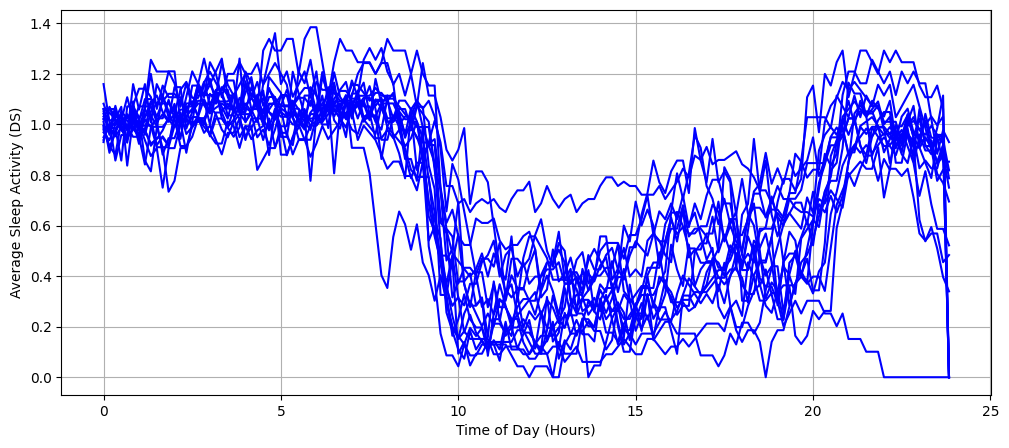

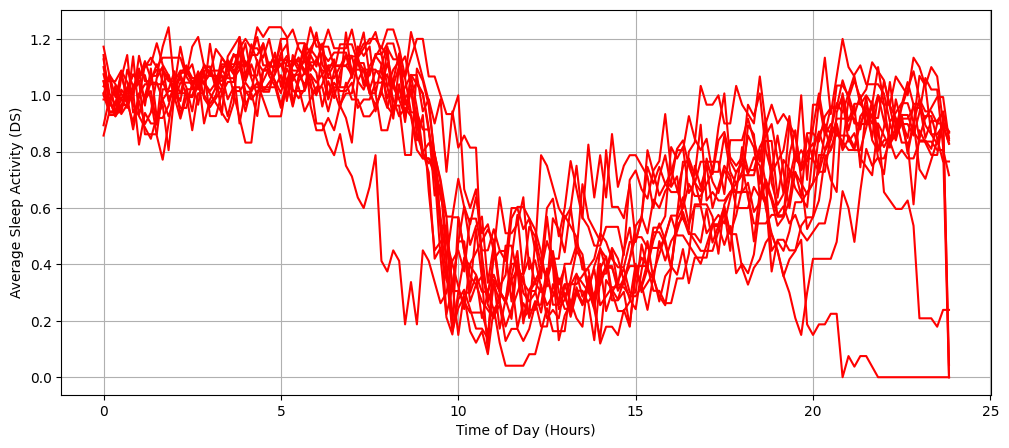

In [76]:
import numpy as np
import matplotlib.pyplot as plt

bin_size = 600
time_bins = np.arange(0, 86400 + bin_size, bin_size)  # Bins for a full 24-hour day




plt.figure(figsize=(12, 5))

for kg in ds:
    file_path = fr"C:\Users\mariu\Documents\down sindrome mice data\kage{kg}_sleep.csv"
    df = pd.read_csv(file_path)
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
    all_dates = df["date"].unique()
    binned_data = []
    for date in all_dates:
        day_data = df[df["date"] == date]
        sleep_series = np.zeros(len(time_bins) - 1)
        for _, row in day_data.iterrows():
            start_idx = np.searchsorted(time_bins, row["sleep_start"], side="right") - 1
            end_idx = np.searchsorted(time_bins, row["sleep_end"], side="right") - 1
            for i in range(start_idx, end_idx):
                sleep_series[i] += bin_size
        binned_data.append(pd.DataFrame({"date": date, "time_bin": time_bins[:-1], "sleep_seconds": sleep_series}))
    binned_df = pd.concat(binned_data, ignore_index=True)
    avg_sleep = binned_df.groupby("time_bin")["sleep_seconds"].mean()
    midsleep = avg_sleep.iloc[1:7].mean()
    avg_sleep2 = avg_sleep / midsleep
    plt.plot(avg_sleep2.index / 3600, avg_sleep2.values, color="blue")

plt.xlabel("Time of Day (Hours)")
plt.ylabel("Average Sleep Activity (DS)")
# plt.title("Average Sleep Activity Over a Typical Day (5-min Bins)")
plt.grid()
plt.show()



plt.figure(figsize=(12, 5))

for kg in wt:
    file_path = fr"C:\Users\mariu\Documents\down sindrome mice data\kage{kg}_sleep.csv"
    df = pd.read_csv(file_path)
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
    all_dates = df["date"].unique()
    binned_data = []
    for date in all_dates:
        day_data = df[df["date"] == date]
        sleep_series = np.zeros(len(time_bins) - 1)
        for _, row in day_data.iterrows():
            start_idx = np.searchsorted(time_bins, row["sleep_start"], side="right") - 1
            end_idx = np.searchsorted(time_bins, row["sleep_end"], side="right") - 1
            for i in range(start_idx, end_idx):
                sleep_series[i] += bin_size
        binned_data.append(pd.DataFrame({"date": date, "time_bin": time_bins[:-1], "sleep_seconds": sleep_series}))
    binned_df = pd.concat(binned_data, ignore_index=True)
    avg_sleep = binned_df.groupby("time_bin")["sleep_seconds"].mean()
    midsleep = avg_sleep.iloc[1:7].mean()
    avg_sleep2 = avg_sleep / midsleep
    plt.plot(avg_sleep2.index / 3600, avg_sleep2.values, color="red")

plt.xlabel("Time of Day (Hours)")
plt.ylabel("Average Sleep Activity (DS)")
# plt.title("Average Sleep Activity Over a Typical Day (5-min Bins)")
plt.grid()
plt.show()

In [73]:
binned_df["time_bin"].unique()
avg_sleep.iloc[66:104].mean()

np.float64(169.4167852062589)

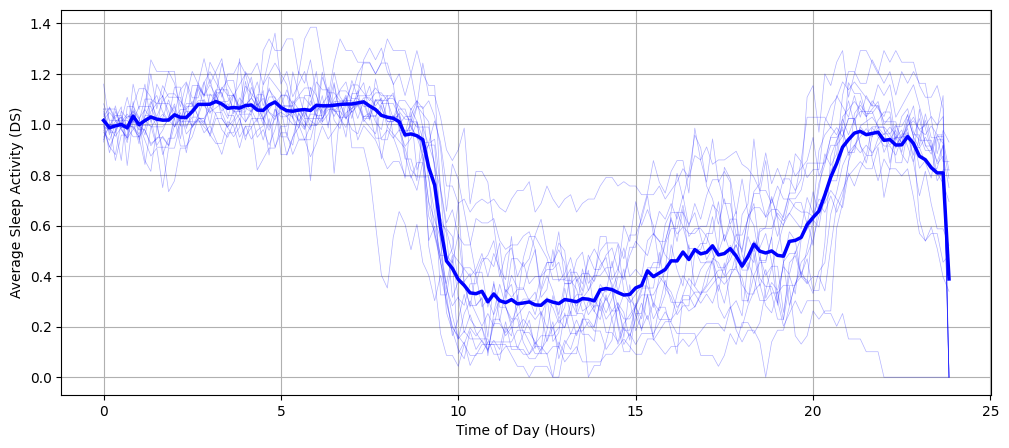

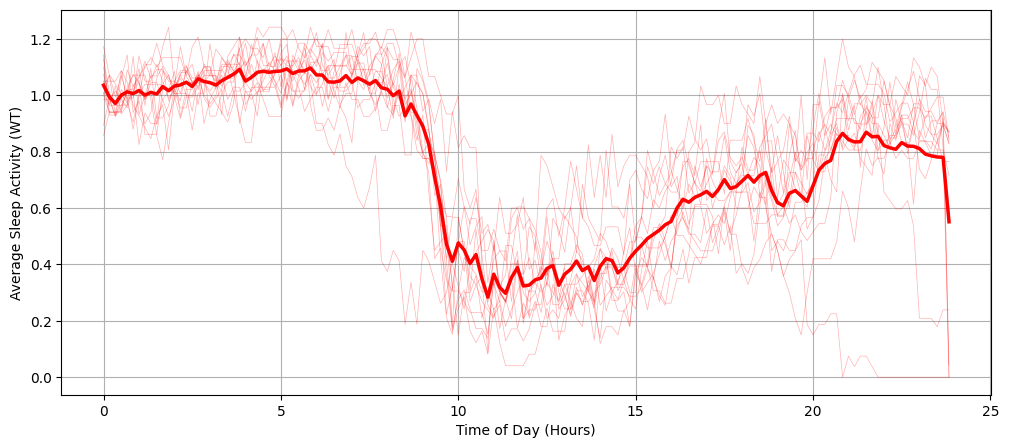

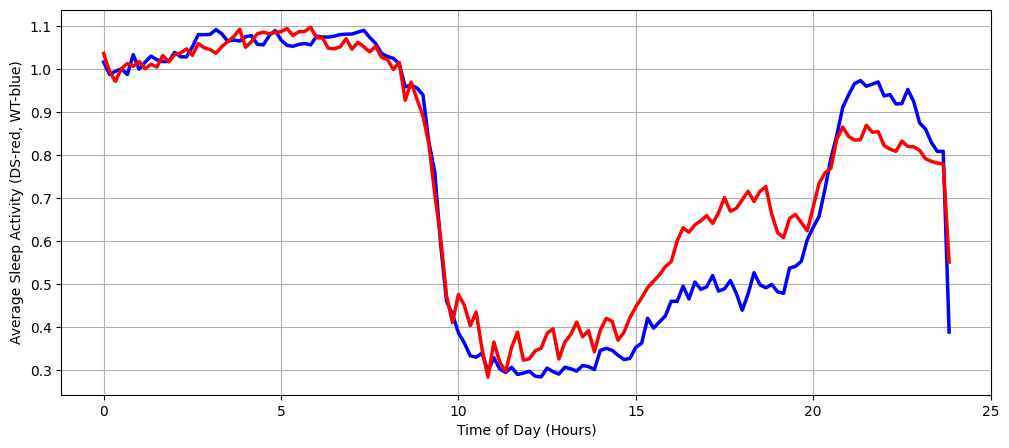

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bin_size = 600
time_bins = np.arange(0, 86400 + bin_size, bin_size)  # Bins for a full 24-hour day

ds_all_sleep = []
wt_all_sleep = []

plt.figure(figsize=(12, 5))

for kg in ds:
    file_path = fr"C:\Users\mariu\Documents\down sindrome mice data\kage{kg}_sleep.csv"
    df = pd.read_csv(file_path)
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
    all_dates = df["date"].unique()
    binned_data = []
    
    for date in all_dates:
        day_data = df[df["date"] == date]
        sleep_series = np.zeros(len(time_bins) - 1)
        for _, row in day_data.iterrows():
            start_idx = np.searchsorted(time_bins, row["sleep_start"], side="right") - 1
            end_idx = np.searchsorted(time_bins, row["sleep_end"], side="right") - 1
            for i in range(start_idx, end_idx):
                sleep_series[i] += bin_size
        binned_data.append(pd.DataFrame({"date": date, "time_bin": time_bins[:-1], "sleep_seconds": sleep_series}))
    
    binned_df = pd.concat(binned_data, ignore_index=True)
    avg_sleep = binned_df.groupby("time_bin")["sleep_seconds"].mean()
    midsleep = avg_sleep.iloc[1:7].mean()
    avg_sleep2 = avg_sleep / midsleep
    ds_all_sleep.append(avg_sleep2.values)

    plt.plot(avg_sleep2.index / 3600, avg_sleep2.values, color="blue", alpha=0.3, linewidth=0.5)

# Compute and plot the thicker average line
ds_avg_sleep = np.mean(np.array(ds_all_sleep), axis=0)
plt.plot(np.arange(len(ds_avg_sleep)) * bin_size / 3600, ds_avg_sleep, color="blue", linewidth=2.5)

plt.xlabel("Time of Day (Hours)")
plt.ylabel("Average Sleep Activity (DS)")
plt.grid()
plt.show()


plt.figure(figsize=(12, 5))

for kg in wt:
    file_path = fr"C:\Users\mariu\Documents\down sindrome mice data\kage{kg}_sleep.csv"
    df = pd.read_csv(file_path)
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
    all_dates = df["date"].unique()
    binned_data = []
    
    for date in all_dates:
        day_data = df[df["date"] == date]
        sleep_series = np.zeros(len(time_bins) - 1)
        for _, row in day_data.iterrows():
            start_idx = np.searchsorted(time_bins, row["sleep_start"], side="right") - 1
            end_idx = np.searchsorted(time_bins, row["sleep_end"], side="right") - 1
            for i in range(start_idx, end_idx):
                sleep_series[i] += bin_size
        binned_data.append(pd.DataFrame({"date": date, "time_bin": time_bins[:-1], "sleep_seconds": sleep_series}))
    
    binned_df = pd.concat(binned_data, ignore_index=True)
    avg_sleep = binned_df.groupby("time_bin")["sleep_seconds"].mean()
    midsleep = avg_sleep.iloc[1:7].mean()
    avg_sleep2 = avg_sleep / midsleep
    wt_all_sleep.append(avg_sleep2.values)

    plt.plot(avg_sleep2.index / 3600, avg_sleep2.values, color="red", alpha=0.3, linewidth=0.5)

# Compute and plot the thicker average line
wt_avg_sleep = np.mean(np.array(wt_all_sleep), axis=0)
plt.plot(np.arange(len(wt_avg_sleep)) * bin_size / 3600, wt_avg_sleep, color="red", linewidth=2.5)

plt.xlabel("Time of Day (Hours)")
plt.ylabel("Average Sleep Activity (WT)")
plt.grid()
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(ds_avg_sleep)) * bin_size / 3600, ds_avg_sleep, color="blue", linewidth=2.5)
plt.plot(np.arange(len(wt_avg_sleep)) * bin_size / 3600, wt_avg_sleep, color="red", linewidth=2.5)
plt.xlabel("Time of Day (Hours)")
plt.ylabel("Average Sleep Activity (DS-red, WT-blue)")
plt.grid()
plt.show()

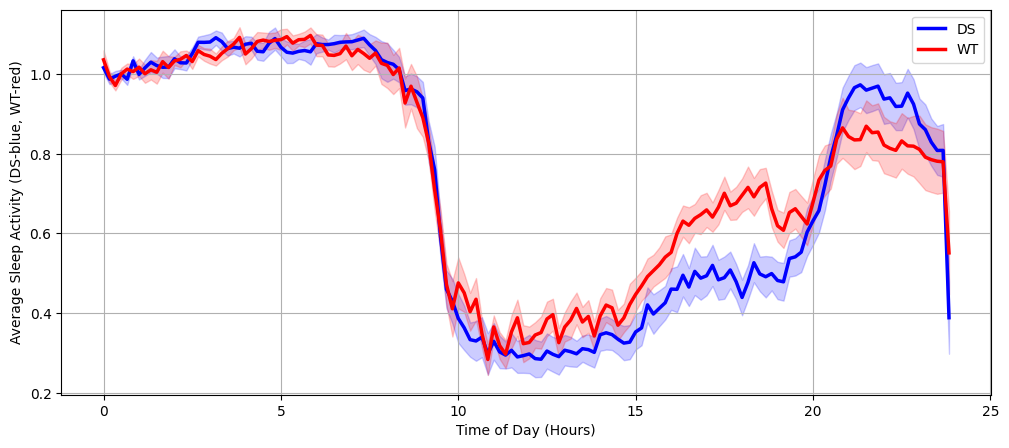

In [80]:
from scipy.stats import sem

# Compute SEM for DS and WT
ds_sem = sem(np.array(ds_all_sleep), axis=0, nan_policy='omit')
wt_sem = sem(np.array(wt_all_sleep), axis=0, nan_policy='omit')

# X-axis (Time of Day in Hours)
x_values = np.arange(len(ds_avg_sleep)) * bin_size / 3600

plt.figure(figsize=(12, 5))

# Plot DS average with error shading
plt.plot(x_values, ds_avg_sleep, color="blue", linewidth=2.5, label="DS")
plt.fill_between(x_values, ds_avg_sleep - ds_sem, ds_avg_sleep + ds_sem, color="blue", alpha=0.2)

# Plot WT average with error shading
plt.plot(x_values, wt_avg_sleep, color="red", linewidth=2.5, label="WT")
plt.fill_between(x_values, wt_avg_sleep - wt_sem, wt_avg_sleep + wt_sem, color="red", alpha=0.2)

plt.xlabel("Time of Day (Hours)")
plt.ylabel("Average Sleep Activity (DS-blue, WT-red)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
NON NORMALIZED

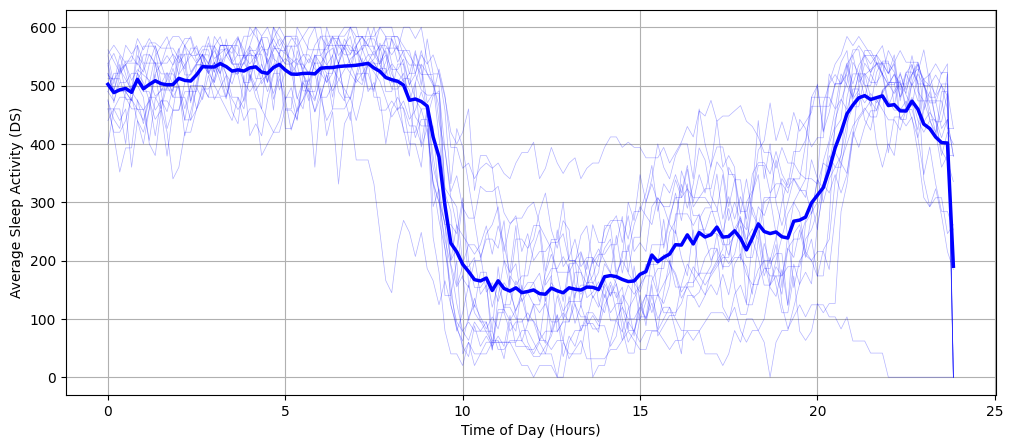

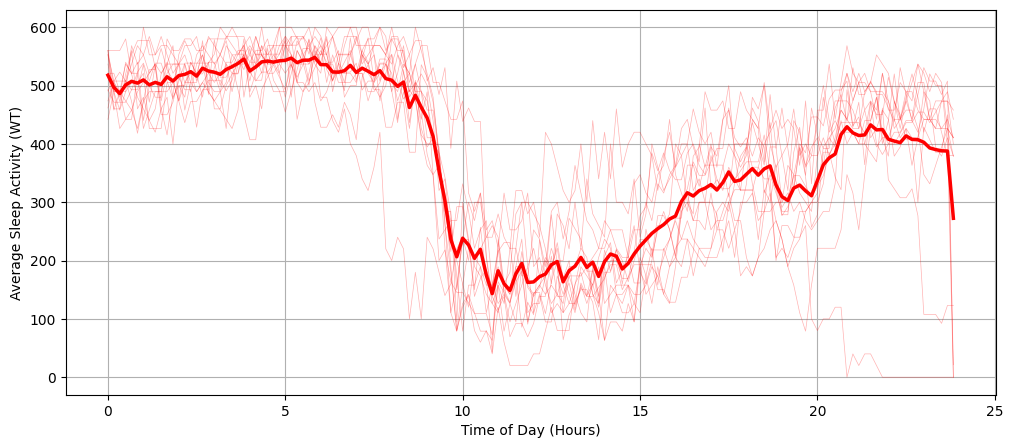

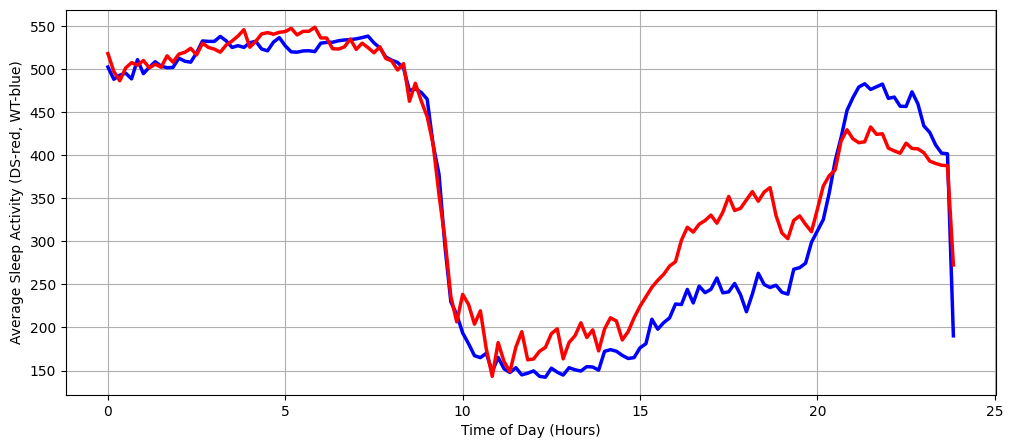

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bin_size = 600
time_bins = np.arange(0, 86400 + bin_size, bin_size)  # Bins for a full 24-hour day

ds_all_sleep = []
wt_all_sleep = []

plt.figure(figsize=(12, 5))

for kg in ds:
    file_path = fr"C:\Users\mariu\Documents\down sindrome mice data\kage{kg}_sleep.csv"
    df = pd.read_csv(file_path)
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
    all_dates = df["date"].unique()
    binned_data = []
    
    for date in all_dates:
        day_data = df[df["date"] == date]
        sleep_series = np.zeros(len(time_bins) - 1)
        for _, row in day_data.iterrows():
            start_idx = np.searchsorted(time_bins, row["sleep_start"], side="right") - 1
            end_idx = np.searchsorted(time_bins, row["sleep_end"], side="right") - 1
            for i in range(start_idx, end_idx):
                sleep_series[i] += bin_size
        binned_data.append(pd.DataFrame({"date": date, "time_bin": time_bins[:-1], "sleep_seconds": sleep_series}))
    
    binned_df = pd.concat(binned_data, ignore_index=True)
    avg_sleep = binned_df.groupby("time_bin")["sleep_seconds"].mean()
    midsleep = avg_sleep.iloc[1:7].mean()
    avg_sleep2 = avg_sleep
    ds_all_sleep.append(avg_sleep2.values)

    plt.plot(avg_sleep2.index / 3600, avg_sleep2.values, color="blue", alpha=0.3, linewidth=0.5)

# Compute and plot the thicker average line
ds_avg_sleep = np.mean(np.array(ds_all_sleep), axis=0)
plt.plot(np.arange(len(ds_avg_sleep)) * bin_size / 3600, ds_avg_sleep, color="blue", linewidth=2.5)

plt.xlabel("Time of Day (Hours)")
plt.ylabel("Average Sleep Activity (DS)")
plt.grid()
plt.show()


plt.figure(figsize=(12, 5))

for kg in wt:
    file_path = fr"C:\Users\mariu\Documents\down sindrome mice data\kage{kg}_sleep.csv"
    df = pd.read_csv(file_path)
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
    all_dates = df["date"].unique()
    binned_data = []
    
    for date in all_dates:
        day_data = df[df["date"] == date]
        sleep_series = np.zeros(len(time_bins) - 1)
        for _, row in day_data.iterrows():
            start_idx = np.searchsorted(time_bins, row["sleep_start"], side="right") - 1
            end_idx = np.searchsorted(time_bins, row["sleep_end"], side="right") - 1
            for i in range(start_idx, end_idx):
                sleep_series[i] += bin_size
        binned_data.append(pd.DataFrame({"date": date, "time_bin": time_bins[:-1], "sleep_seconds": sleep_series}))
    
    binned_df = pd.concat(binned_data, ignore_index=True)
    avg_sleep = binned_df.groupby("time_bin")["sleep_seconds"].mean()
    midsleep = avg_sleep.iloc[1:7].mean()
    avg_sleep2 = avg_sleep
    wt_all_sleep.append(avg_sleep2.values)

    plt.plot(avg_sleep2.index / 3600, avg_sleep2.values, color="red", alpha=0.3, linewidth=0.5)

# Compute and plot the thicker average line
wt_avg_sleep = np.mean(np.array(wt_all_sleep), axis=0)
plt.plot(np.arange(len(wt_avg_sleep)) * bin_size / 3600, wt_avg_sleep, color="red", linewidth=2.5)

plt.xlabel("Time of Day (Hours)")
plt.ylabel("Average Sleep Activity (WT)")
plt.grid()
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(ds_avg_sleep)) * bin_size / 3600, ds_avg_sleep, color="blue", linewidth=2.5)
plt.plot(np.arange(len(wt_avg_sleep)) * bin_size / 3600, wt_avg_sleep, color="red", linewidth=2.5)
plt.xlabel("Time of Day (Hours)")
plt.ylabel("Average Sleep Activity (DS-red, WT-blue)")
plt.grid()
plt.show()

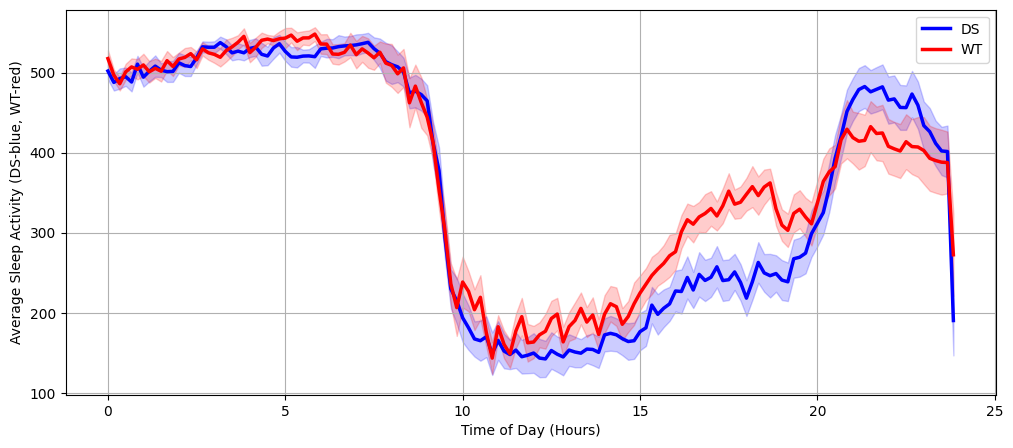

In [82]:
from scipy.stats import sem

# Compute SEM for DS and WT
ds_sem = sem(np.array(ds_all_sleep), axis=0, nan_policy='omit')
wt_sem = sem(np.array(wt_all_sleep), axis=0, nan_policy='omit')

# X-axis (Time of Day in Hours)
x_values = np.arange(len(ds_avg_sleep)) * bin_size / 3600

plt.figure(figsize=(12, 5))

# Plot DS average with error shading
plt.plot(x_values, ds_avg_sleep, color="blue", linewidth=2.5, label="DS")
plt.fill_between(x_values, ds_avg_sleep - ds_sem, ds_avg_sleep + ds_sem, color="blue", alpha=0.2)

# Plot WT average with error shading
plt.plot(x_values, wt_avg_sleep, color="red", linewidth=2.5, label="WT")
plt.fill_between(x_values, wt_avg_sleep - wt_sem, wt_avg_sleep + wt_sem, color="red", alpha=0.2)

plt.xlabel("Time of Day (Hours)")
plt.ylabel("Average Sleep Activity (DS-blue, WT-red)")
plt.legend()
plt.grid()
plt.show()